# This code plots 1-cos gust for both traverse and actuator
    - specitic for the four test cases
    - case 13, ramp up, alpha_start = 10, alpha_end = 20
    - case 20, ramp up alpha_start = 30, alpha_end = 10
    - case 25, ramp down, alpha_start = 10, alpha_end = 30
    - case 28, ramp down, alpha_start = 20, alpha_end = 0

In [53]:
# Set the font family to Times New Roman
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 15

plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'

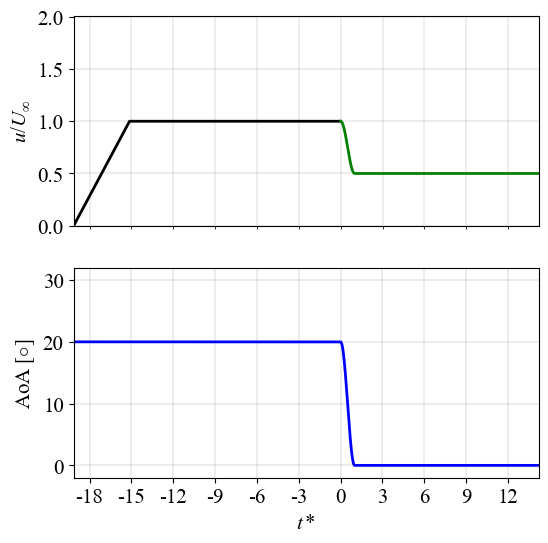

In [114]:
import numpy as np
import matplotlib.pyplot as plt

def one_miuns_cos_traverse(time):
    return( 1 + 0.5/2*(1-np.cos(2*np.pi/0.6*time)) )

def one_miuns_cos_actuator(time):
    return( 1/2*(1-np.cos(2*np.pi/0.3*time)))

def actuator_angle(a_start, a_end, time): # in degree alpha_start, alpha_end
    if a_start < a_end:
        return( a_start + (a_end-a_start)/2*(1-np.cos(2*np.pi/0.6*time)) )
    else:
        return( a_start - (a_start-a_end)/2*(1-np.cos(2*np.pi/0.6*time)) )

t_total = 10   # 10s
freq    = 1000 # frequency sampling
T       = 0.3  # period is 0.3s
t       = np.arange(0,t_total,1/freq) # time
t1      = 1.2    # 1.2s for initial acceleration to 1m/s
a1      = 0.834  #  m/s^2; acceleration of the initial stage
t2      = 5.74   # 5.74s; this is the start time of the gust
t3      = t2 + T # 6.04s; this is the end time of the gust
v       = np.zeros(len(t))
v_ramp_up   = np.zeros(len(t[int(t2*freq):-1]))
v_ramp_down = np.zeros(len(t[int(t2*freq):-1]))
v_ramp_no   = np.zeros(len(t[int(t2*freq):-1])) + 1
v_actuator  = np.zeros(len(t))
angle_actuator  = np.zeros(len(t))

case_show = '28'

# calculate the velocity 
for i in range(len(t)):
    if t[i] >= 0 and t[i] < t1:
        v[i] = a1 * t[i]
        # set initial angle
        if case_show == '13':
            angle_actuator[i] = 10
        elif case_show == '20':
            angle_actuator[i] = 30
        elif case_show == '25':
            angle_actuator[i] = 10
        elif case_show == '28':
            angle_actuator[i] = 20
    elif t[i] >= t1 and t[i] < t2:
        v[i] = 1
        # set initial angle
        if case_show == '13':
            angle_actuator[i] = 10
        elif case_show == '20':
            angle_actuator[i] = 30
        elif case_show == '25':
            angle_actuator[i] = 10
        elif case_show == '28':
            angle_actuator[i] = 20
    elif t[i] >= t2 and t[i] < t3:
        v[i] = one_miuns_cos_traverse(t[i]-t2)
        v_actuator[i] = one_miuns_cos_actuator(t[i]-t2)
        if case_show == '13':
            angle_actuator[i] = actuator_angle(10, 20, t[i]-t2)
        elif case_show == '20':
            angle_actuator[i] = actuator_angle(30, 10, t[i]-t2)
        elif case_show == '25':
            angle_actuator[i] = actuator_angle(10, 30, t[i]-t2)
        elif case_show == '28':
            angle_actuator[i] = actuator_angle(20, 0, t[i]-t2)
    else:
        v[i] = 1.5
        # set end angle
        if case_show == '13':
            angle_actuator[i] = 20
        elif case_show == '20':
            angle_actuator[i] = 10
        elif case_show == '25':
            angle_actuator[i] = 30
        elif case_show == '28':
            angle_actuator[i] = 0

v_ramp_up   = v[int(t2*freq):-1]
v_ramp_down = 2- v[int(t2*freq):-1]
        
fig, ax = plt.subplots(2,1,figsize=(6,6))
bbb = (t-t2)/T
gust_srtart_index = np.where(bbb == 0)[0][0]
ax[0].plot(bbb[0:gust_srtart_index], v[0:gust_srtart_index], color='black', linewidth=2)
if case_show in ['13', '20']:
    ax[0].plot((t[int(t2*freq):-1]-t2)/T, v_ramp_up, color='red', label='Ramp up', linewidth=2)
elif case_show in ['25', '28']:
    ax[0].plot((t[int(t2*freq):-1]-t2)/T, v_ramp_down, color='green', label='Ramp down', linewidth=2)

ax[0].grid(which='both', axis='both', color='k', linestyle='-', linewidth=0.1)
ax[0].margins(x=0)
ax[0].set_xticks([])
ax[0].set_yticks(np.arange(0,2.01,0.5))
ax[0].set_yticklabels(np.arange(0,2.01,0.5))
ax[0].set_ylim(0,2.01)
# ax[0].legend(loc='upper left')
ax[0].set_ylabel('$u/U_{\infty}$')
ax[0].tick_params(axis='x',direction='out', length=5, width=0.5, colors='black',
               grid_color='r', grid_alpha=0.5)
ax[0].xaxis.set_minor_locator(plt.MultipleLocator(3))

ax[1].plot((t-t2)/T, angle_actuator,color='blue', label='Actuator', linewidth=2)
ax[1].set_xlabel('$t*$')
ax[1].margins(x=0)
ax[1].set_xticks(np.arange(-18,14,3))
ax[1].set_xticklabels(np.arange(-18,14,3))
ax[1].set_ylim([0-2,30+2])
ax[1].grid(which='both', axis='both', color='k', linestyle='-', linewidth=0.1)

ax[1].set_ylabel('AoA $[\circ]$')

fig.savefig('one_minus_cos_'+'case_'+case_show+'.svg', bbox_inches='tight')

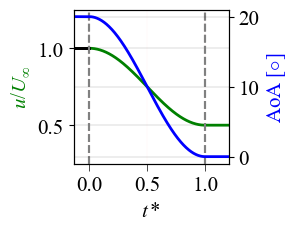

In [115]:
fig, ax = plt.subplots(figsize=(2,2)) #(2,4)
ax.plot(t[0:gust_srtart_index], v[0:gust_srtart_index], color='black', linewidth=2)
if case_show == ['13', '20']:
    ax.plot(t[int(t2*freq):-1], v_ramp_up, color='red', label='Ramp up', linewidth=2)
    ax.set_yticks([1,1.5])
    ax.set_ylim(0.75,1.751)
    ax.set_ylabel('$u/U_{\infty}$', color='r')
elif case_show in ['25', '28']:
    ax.plot(t[int(t2*freq):-1], v_ramp_down, color='green', label='Ramp down', linewidth=2)
    ax.set_yticks([0.5,1.0])
    ax.set_ylim(0.25,1.251)
    ax.set_ylabel('$u/U_{\infty}$', color='green')
ax.plot(t[:int(t2*freq)], np.ones_like(t[:int(t2*freq)]), color='k', label='Constant', linewidth=2)

ax.grid(which='both', axis='both', color='k', linestyle='-', linewidth=0.1)
ax.margins(x=0)
ax.set_xticks([])
ax.set_xlim(5.7,6.101)
# ax.xaxis.set_minor_locator(plt.MultipleLocator(0.15))
ax.tick_params(axis='x',direction='out', length=5, width=0.5, colors='black',
               grid_color='r', grid_alpha=0.15)

ax.axvline(x=t2, color='gray', linestyle='--', zorder=1)
ax.axvline(x=t3, color='gray', linestyle='--', zorder=1)
ax.set_xlabel('$t*$')

ax2 = ax.twinx()
ax2.plot(t, angle_actuator,color='blue', label='Actuator', linewidth=2)
ax2.margins(x=0)
ax2.grid(which='both', axis='both', color='k', linestyle='-', linewidth=0.1)
ax2.set_xticks(np.arange(5.74,6.05,0.15))
ax2.set_xticklabels(['0.0','0.5','1.0'])
ax2.set_xlim(5.7,6.101)
ax2.axvline(x=t2, color='gray', linestyle='--', zorder=1)
ax2.axvline(x=t3, color='gray', linestyle='--', zorder=1)

ax2.set_ylabel('AoA $[\circ]$', color='b')

fig.savefig('one_minus_cos_zoom_in'+'case_'+case_show+'.svg', bbox_inches='tight')